In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(dplyr)
library(patchwork)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [2]:
obj = qs::qread('../00_preprocessing/_targets/objects/exp_other_obob')
obj

Loading required package: SeuratObject

Attaching sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: Seurat


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




An object of class Seurat 
56583 features across 28456 samples within 3 assays 
Active assay: SCT (24262 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [27]:
2

[1] 2

## 

In [4]:
sce = as.SingleCellExperiment(obj)
sce

class: SingleCellExperiment 
dim: 24262 28456 
metadata(0):
assays(2): counts logcounts
rownames(24262): Lypla1 Tcea1 ... Olfr187 ENSMUSG00000100896
rowData names(0):
colnames(28456): CCTATCGAGCCATTCA_1_1 GTCCTCAAGCGAGGAG_1_1 ...
  TTAATCCGTGATAGTA_5_3 TCACTCGAGGATACCG_5_3
colData names(35): orig.ident nCount_RNA ... labels ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(2): RNA integrated

In [5]:
milo_obj = Milo(sce)

In [6]:
milo_obj <- buildGraph(milo_obj, k = 30, d = 30, reduced.dim = "PCA")

Constructing kNN graph with k:30



In [7]:
milo_obj <- makeNhoods(milo_obj, prop = 0.1, k = 30, d=30, refined = TRUE, reduced_dims = "PCA")

Checking valid object

Running refined sampling with reduced_dim



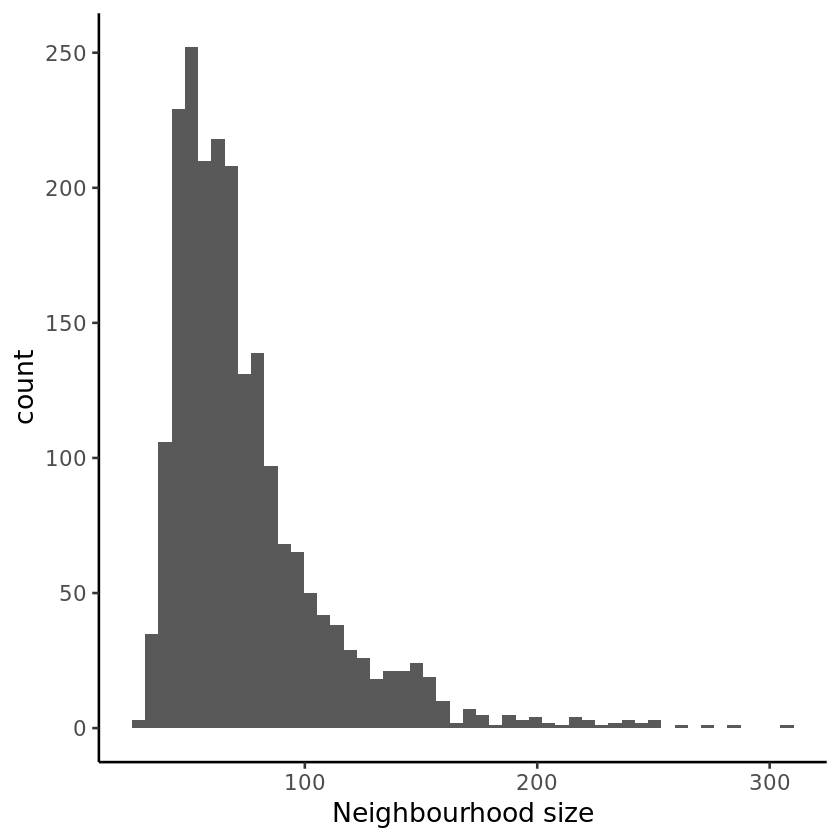

In [8]:
plotNhoodSizeHist(milo_obj)

In [9]:
meta = data.frame(colData(milo_obj))
meta = meta %>% mutate(batch = stringr::str_replace_all(batch, stringr::fixed(" "), '__'))
head(meta)

,orig.ident,nCount_RNA,nFeature_RNA,Index.10x,nCount_HTO,nFeature_HTO,Index.HTO,nCount_spliced,nFeature_spliced,nCount_unspliced,⋯,strain,treatment,time,collection_date,isolation_date,batch,predicted.id,prediction.score.max,labels,ident
,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<dbl>,<fct>,<fct>
CCTATCGAGCCATTCA_1_1,SI-TT-A11,49695,7017,SI-TT-A11,1473,12,D706,7105,3206,42590,⋯,obob,FGF1,Day14,220407,22/6/2022,Batch__1,NG2_OPC2,0.3917772,NG2_OPC2-Microglia,12
GTCCTCAAGCGAGGAG_1_1,SI-TT-A11,41375,6414,SI-TT-A11,2757,12,D706,6392,2838,34983,⋯,obob,FGF1,Day5,211213,22/6/2022,Batch__1,NFOL,1.0000000,NFOL,13
AAGGTAATCTGAGGCC_1_1,SI-TT-A11,40000,6407,SI-TT-A11,1678,12,D706,5088,2532,34912,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch__1,NG2_OPC2,0.9625983,NG2_OPC2-Microglia,12
TCCGTGTCACCTGTCT_1_1,SI-TT-A11,39270,6913,SI-TT-A11,1516,12,D706,6058,2883,33212,⋯,obob,FGF1,Day14,220407,22/6/2022,Batch__1,Parstuber2A,0.2406799,NG2_OPC2-Microglia,12
CTTCGGTTCAGCTGAT_1_1,SI-TT-A11,40118,5968,SI-TT-A11,2558,12,D706,7081,2634,33037,⋯,obob,FGF1,Day5,211213,22/6/2022,Batch__1,NFOL,0.9833581,NFOL,13
TCTAACTCAATCTCGA_1_1,SI-TT-A11,35178,6131,SI-TT-A11,1966,12,D706,4758,2406,30420,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch__1,NG2_OPC2,0.4448438,NG2_OPC2-Microglia,12


In [10]:
colData(milo_obj)$group = interaction(meta$treatment, meta$time)
colData(milo_obj)$batch = meta$batch

In [11]:
milo_obj <- countCells(milo_obj, meta.data = data.frame(colData(milo_obj)), sample="hash.mcl.ID")

Checking meta.data validity

Counting cells in neighbourhoods



In [12]:
head(nhoodCounts(milo_obj))

   [[ suppressing 28 column names ‘M13’, ‘N7’, ‘J11’ ... ]]



6 x 28 sparse Matrix of class "dgCMatrix"
                                                         
1 . . 1 3 1 3 1 1 6 1 . 2 1 5 2 1 6 . 1 2 . 4 . . 2 5 2 .
2 1 . 2 4 1 1 3 . 3 4 3 3 8 4 . 3 9 3 . 2 . 2 . 2 3 1 4 .
3 . . 2 1 6 7 2 2 1 . 1 3 6 2 6 1 3 1 2 5 . 4 . 4 2 4 2 5
4 1 1 2 1 1 . 1 . 5 6 4 3 1 4 1 3 3 2 1 3 2 2 2 3 . . 1 2
5 1 1 3 . 2 . 7 1 . 1 . . 1 4 1 . 5 1 2 7 1 2 . . 1 1 . 1
6 1 1 . 4 . . 6 . 6 2 3 2 8 2 2 1 4 1 . . . . . 3 1 1 1 3

In [13]:
design <- data.frame(colData(milo_obj))[,c("hash.mcl.ID", "group", "batch")]
design <- distinct(design)
rownames(design) <- design$hash.mcl.ID
design

,hash.mcl.ID,group,batch
,<chr>,<fct>,<chr>
M13,M13,FGF1.Day14,Batch__1
N7,N7,FGF1.Day5,Batch__1
J11,J11,FGF1.Day14,Batch__1
M8,M8,Veh_PF.Day5,Batch__1
J2,J2,Veh_PF.Day14,Batch__1
M24,M24,Veh_PF.Day14,Batch__1
N8,N8,Veh_PF.Day5,Batch__1
M9,M9,FGF1.Day5,Batch__1
N17,N17,FGF1.Day5,Batch__2


In [14]:
milo_obj <- calcNhoodDistance(milo_obj, d=30, reduced.dim = "PCA")

In [15]:
da_results <- testNhoods(milo_obj, design = ~ batch + group, design.df = design)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



In [16]:
da_results %>%
  arrange(SpatialFDR) %>%
  head()

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
635,-4.278253,9.682107,28.06547,1.178129e-07,0.0002487030,635,0.0006501566
1546,-3.766827,9.518087,24.50338,7.443881e-07,0.0007857016,1546,0.0020855492
407,-3.717325,9.471914,23.53867,1.228243e-06,0.0008642736,407,0.0022869874
1062,-4.212345,9.399178,22.00315,2.729771e-06,0.0014406367,1062,0.0039032671
494,-3.484359,9.368428,16.14285,5.883226e-05,0.0212888148,494,0.0536370790
607,-3.076518,9.711964,16.08964,6.050824e-05,0.0212888148,607,0.0536370790


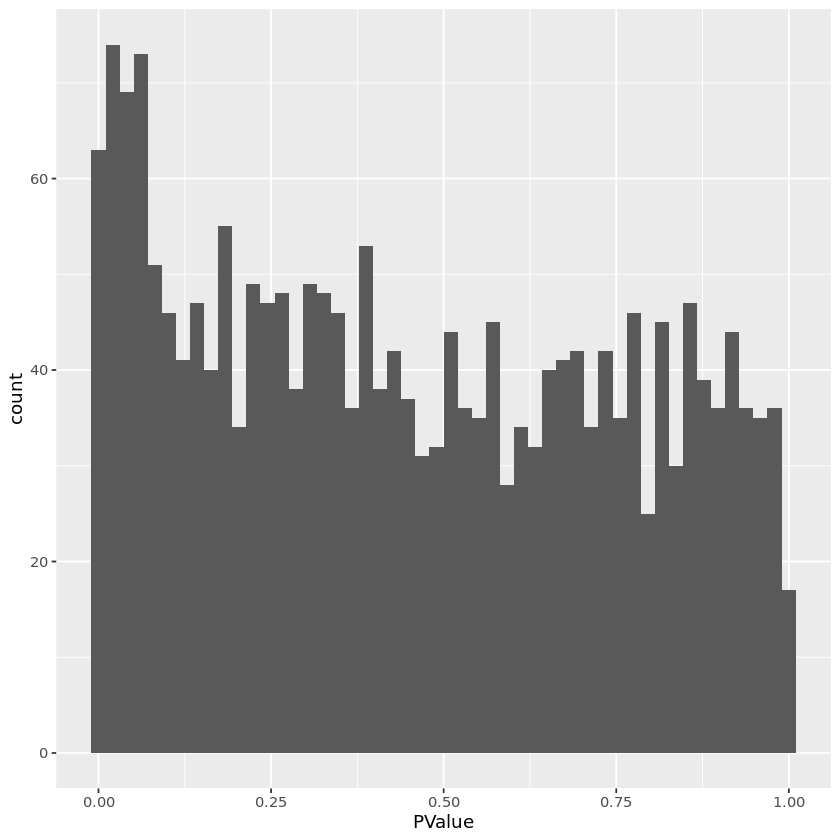

In [17]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=50)

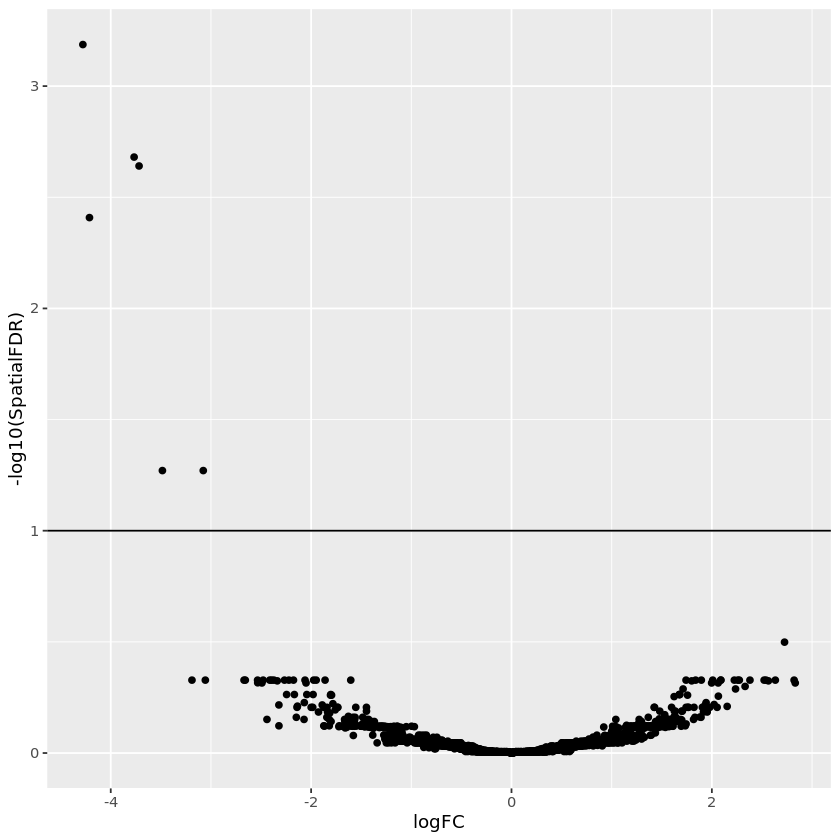

In [18]:
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) +
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

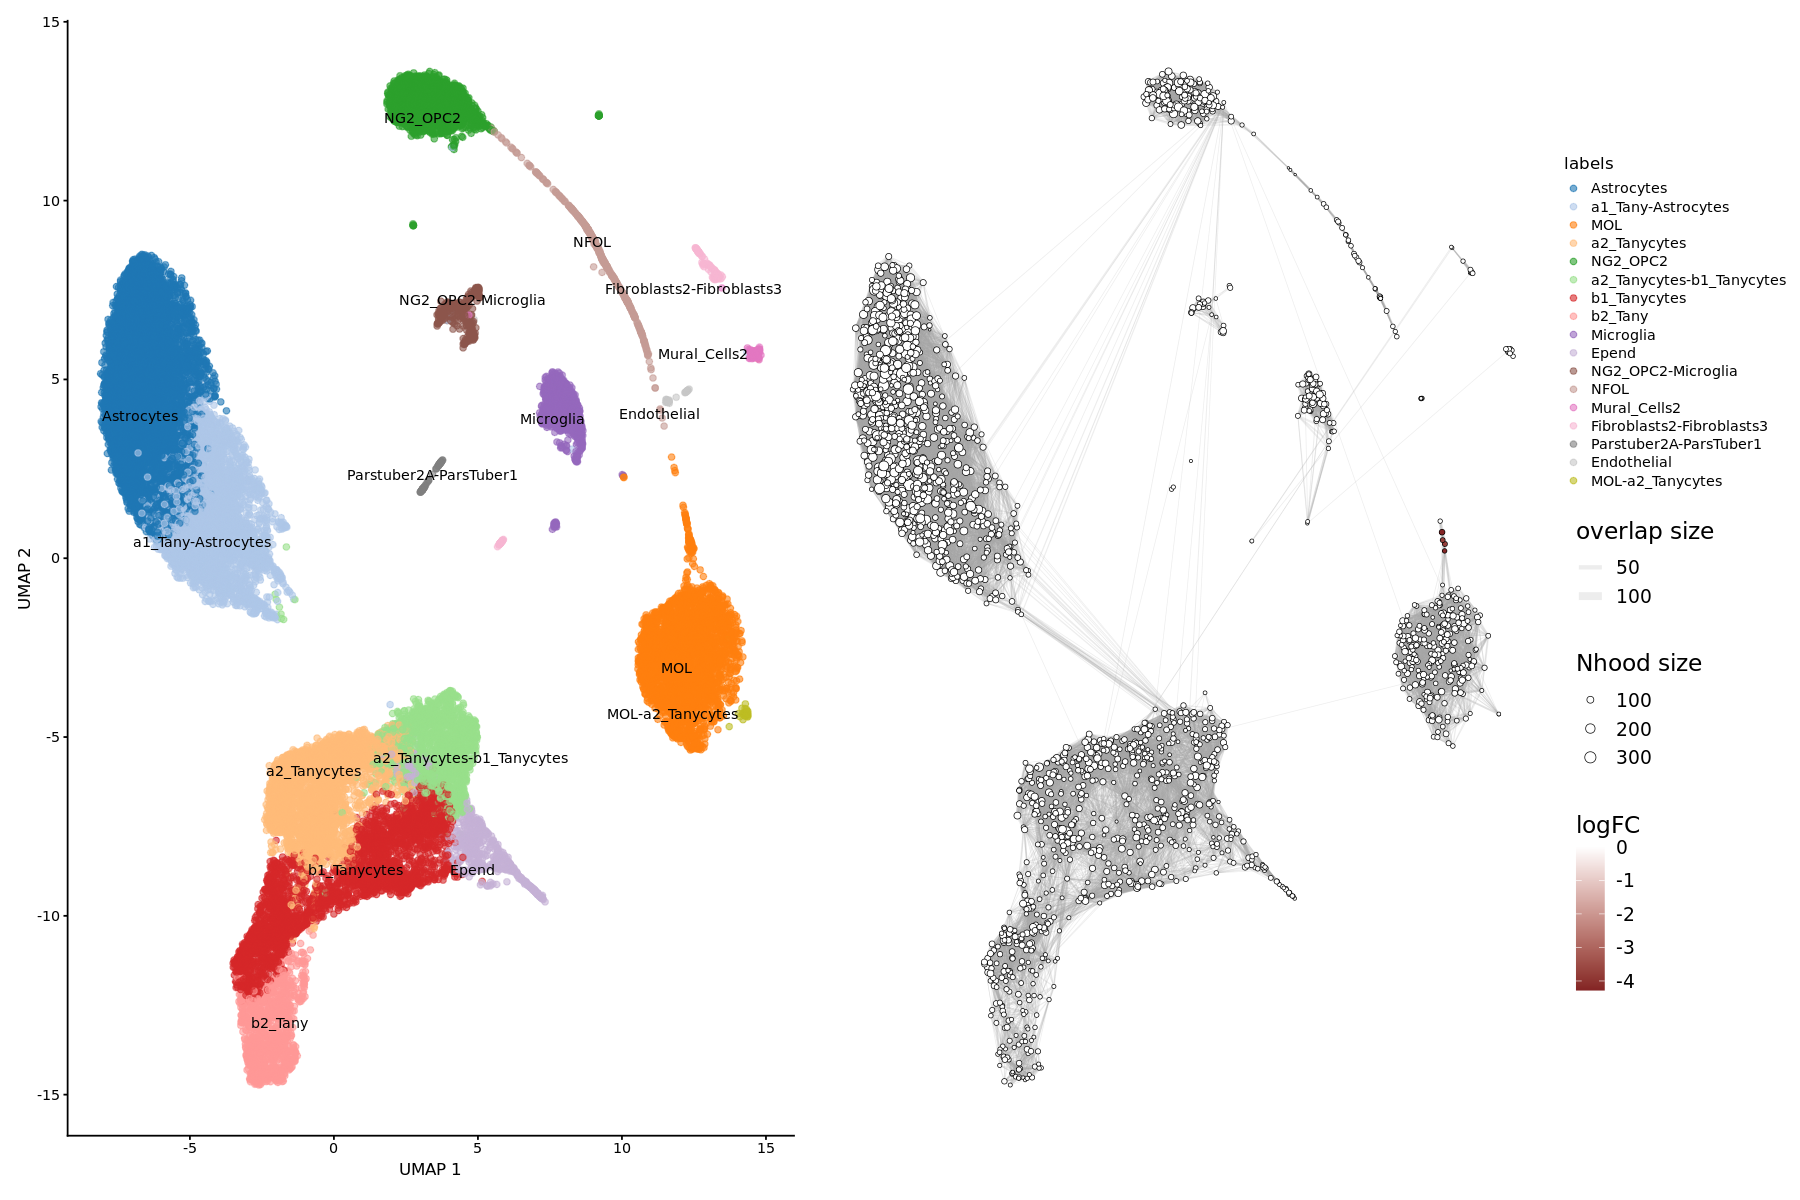

In [19]:
options(repr.plot.width=15, repr.plot.height=10)
milo_obj <- buildNhoodGraph(milo_obj)

## Plot single-cell UMAP
umap_pl <- plotReducedDim(milo_obj, dimred = "UMAP", colour_by="labels", text_by = "labels", text_size = 3) +
  guides(fill="none")

## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(milo_obj, da_results, layout="UMAP",alpha=0.05)

umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [20]:
da_results <- annotateNhoods(milo_obj, da_results, coldata_col = "labels")
head(da_results)

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,labels,labels_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,0.1402099,9.406092,0.03748101,0.84648985,0.9780880,1,0.9872026,Fibroblasts2-Fibroblasts3,0.9800000
2,-0.1913065,9.606666,0.07681520,0.78166190,0.9620899,2,0.9845988,Astrocytes,1.0000000
3,-0.1280272,9.667941,0.03600316,0.84950981,0.9780880,3,0.9872026,b1_Tanycytes,1.0000000
4,-0.3128682,9.495103,0.19897543,0.65555120,0.9412990,4,0.9845988,Astrocytes,0.8000000
5,-0.9946546,9.309202,1.83345738,0.17572631,0.7217707,5,0.8841909,b1_Tanycytes,0.9302326
6,1.4808247,9.429033,3.60689748,0.05754656,0.5235609,6,0.7576984,MOL,1.0000000


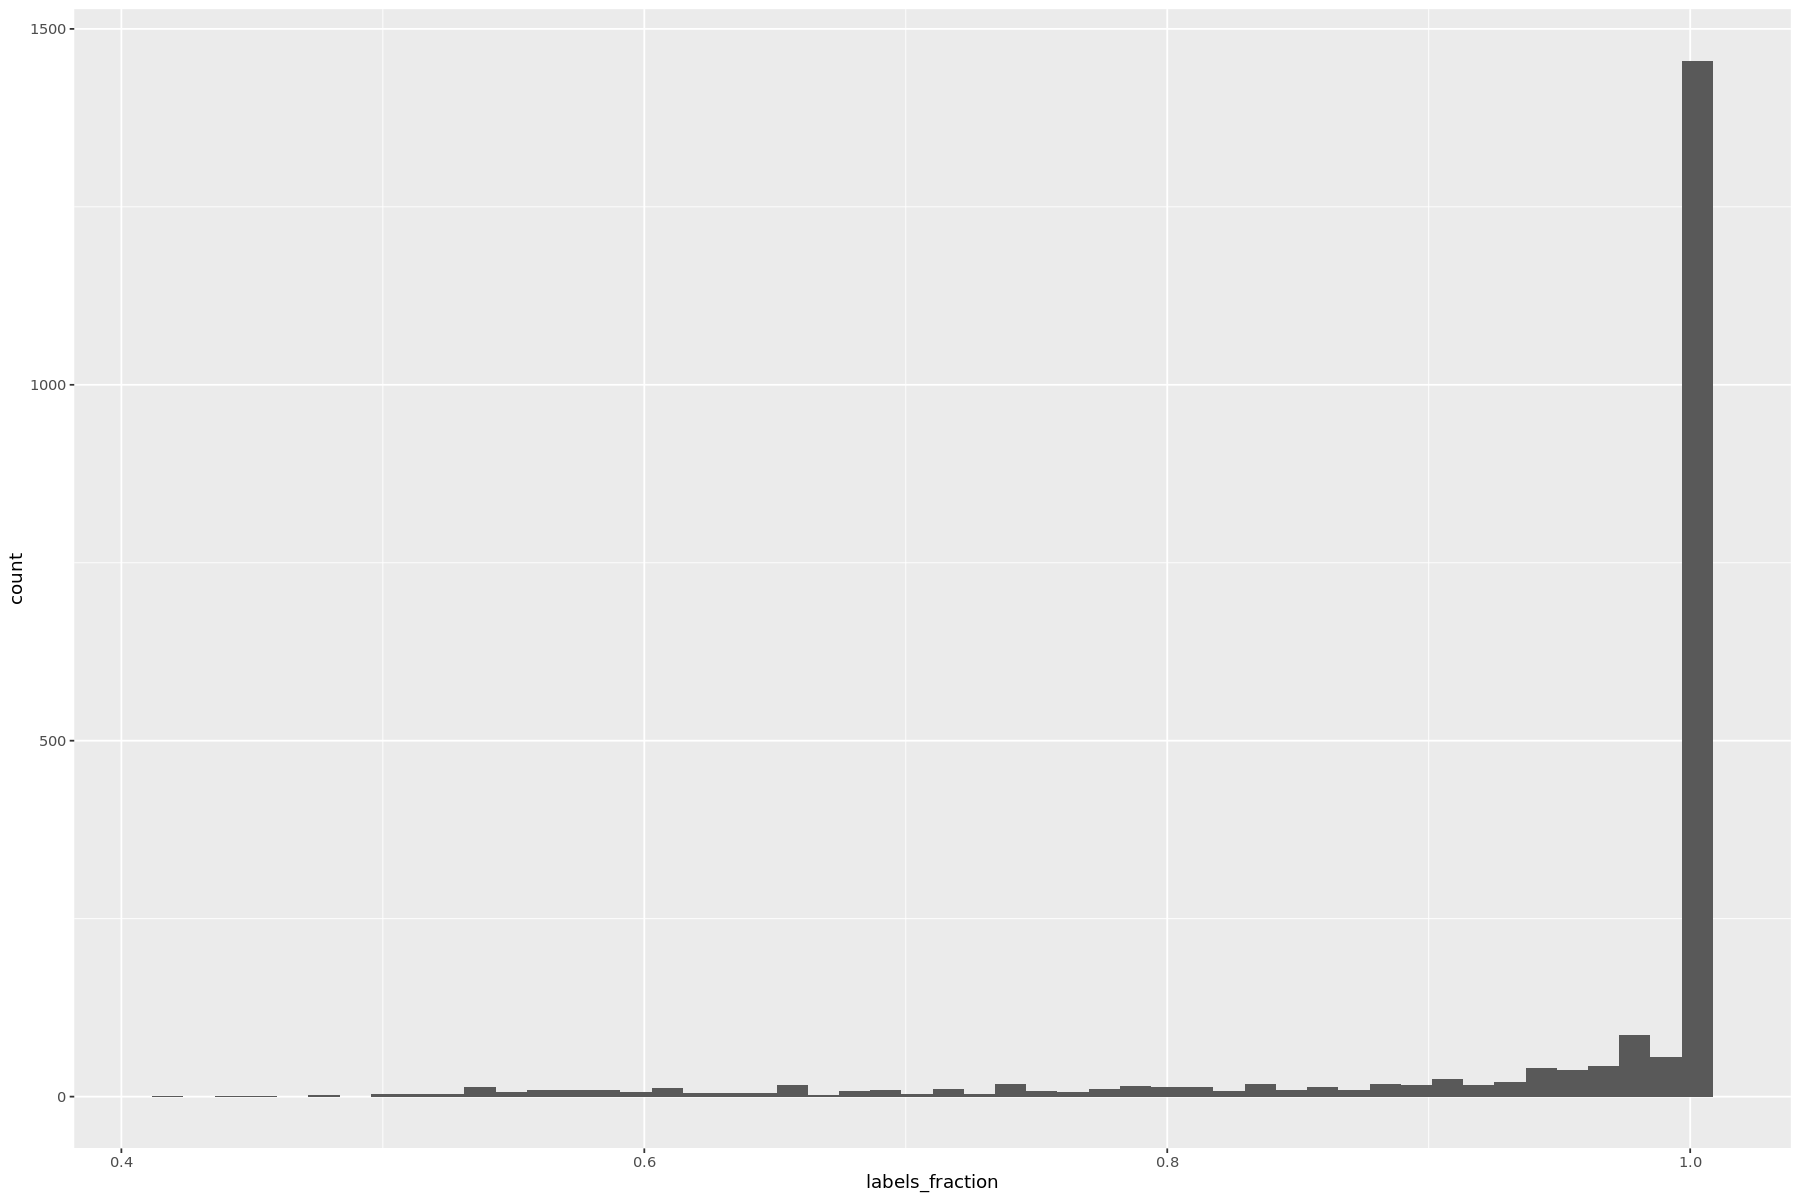

In [21]:
ggplot(da_results, aes(labels_fraction)) + geom_histogram(bins=50)

In [22]:
da_results$labels <- ifelse(da_results$labels_fraction < 0.6, "Mixed", da_results$labels)

In [23]:
da_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,labels,labels_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,0.14020990,9.406092,0.03748101,0.846489845,0.9780880,1,0.9872026,Fibroblasts2-Fibroblasts3,0.9800000
2,-0.19130645,9.606666,0.07681520,0.781661904,0.9620899,2,0.9845988,Astrocytes,1.0000000
3,-0.12802724,9.667941,0.03600316,0.849509806,0.9780880,3,0.9872026,b1_Tanycytes,1.0000000
4,-0.31286822,9.495103,0.19897543,0.655551203,0.9412990,4,0.9845988,Astrocytes,0.8000000
5,-0.99465460,9.309202,1.83345738,0.175726311,0.7217707,5,0.8841909,b1_Tanycytes,0.9302326
6,1.48082468,9.429033,3.60689748,0.057546561,0.5235609,6,0.7576984,MOL,1.0000000
7,-0.29043316,9.403357,0.14692073,0.701497318,0.9491814,7,0.9845988,MOL,1.0000000
8,-0.23701095,10.210230,0.20027148,0.654505713,0.9412990,8,0.9845988,Astrocytes,0.9924812
9,-0.10843294,10.009759,0.03728704,0.846882765,0.9780880,9,0.9872026,Astrocytes,0.9902913


Converting group.by to factor...



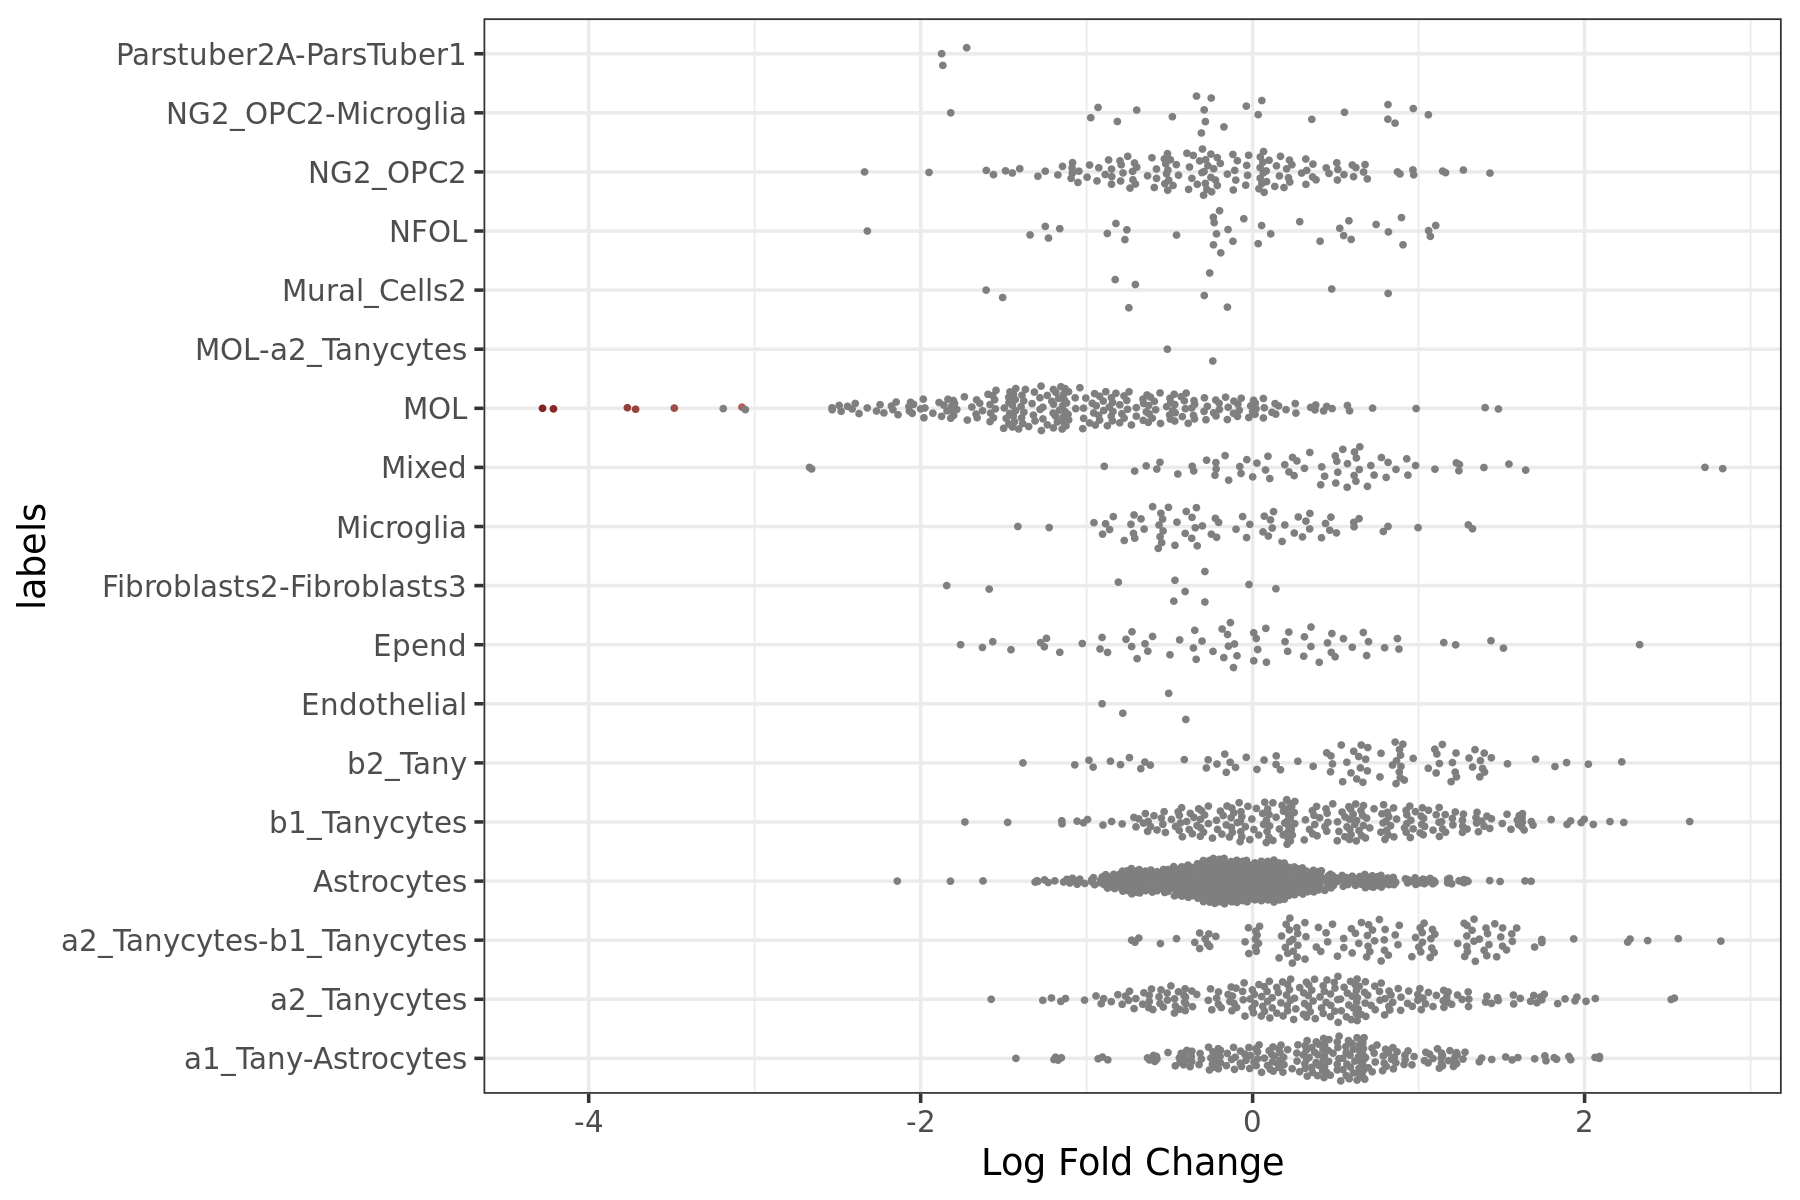

In [24]:
plotDAbeeswarm(da_results, group.by = "labels")

In [25]:
da_results$SpatialFDR

[1] 0.9872026275 0.9845987572 0.9872026275 0.9845987572 0.8841909163
   [6] 0.7576983562 0.9845987572 0.9845987572 0.9872026275 0.9872026275
  [11] 0.7576983562 0.9000715395 0.9872026275 0.7543360493 0.7502446992
  [16] 0.9000715395 0.8650764639 0.9872026275 0.7611757349 0.9845987572
  [21] 0.9845987572 0.9286911466 0.9000715395 0.9000715395 0.4735807101
  [26] 0.9000715395 0.8841909163 0.9000715395 0.9430956790 0.8494063282
  [31] 0.9872026275 0.9872026275 0.9000715395 0.9000715395 0.9845987572
  [36] 0.6907083728 0.9309172246 0.9698226092 0.9872026275 0.9286911466
  [41] 0.9286911466 0.5150406475 0.9872026275 0.9872026275 0.8650764639
  [46] 0.9587249479 0.9000715395 0.9763607152 0.9237586463 0.9309172246
  [51] 0.9000715395 0.7611757349 0.9923799397 0.7570970200 0.9587249479
  [56] 0.9587249479 0.9845987572 0.9845987572 0.9309172246 0.9872026275
  [61] 0.6539076275 0.9000715395 0.4699929409 0.9309172246 0.9698226092
  [66] 0.9000715395 0.9845987572 0.9953239342 0.9872026275 0.9845987572
  [71] 0.9845987572 0.8306069312 0.8841909163 0.7611757349 0.9872026275
  [76] 0.9845987572 0.9845987572 0.7570970200 0.4699929409 0.9000715395
  [81] 0.9845987572 0.9698226092 0.9872026275 0.9872026275 0.9397520460
  [86] 0.8862325123 0.9845987572 0.9000715395 0.4840389085 0.6480722995
  [91] 0.9331255829 0.9587249479 0.9845987572 0.9845987572 0.7611757349
  [96] 0.9000715395 0.7673430359 0.9872026275 0.9872026275 0.4699929409
 [101] 0.9845987572 0.5455464294 0.9286911466 0.9286911466 0.7060791462
 [106] 0.9450436341 0.9845987572 0.9872026275 0.9000715395 0.9286911466
 [111] 0.7570970200 0.9845987572 0.9570522783 0.7576983562 0.7060791462
 [116] 0.9845987572 0.8494063282 0.7611757349 0.8841909163 0.9256124150
 [121] 0.9000715395 0.9845987572 0.9840043214 0.9872026275 0.9872026275
 [126] 0.9872026275 0.9000715395 0.7108051144 0.9914663416 0.9893668286
 [131] 0.9286911466 0.9570522783 0.9845987572 0.5549021278 0.9872026275
 [136] 0.9000715395 0.9845987572 0.9000715395 0.9845987572 0.9698226092
 [141] 0.9872026275 0.9598500907 0.9570522783 0.9763607152 0.9993459470
 [146] 0.8736933028 0.7668333630 0.8736933028 0.7664651073 0.9237586463
 [151] 0.9698226092 0.9698226092 0.8841909163 0.9763607152 0.8833892879
 [156] 0.9351758592 0.9406280102 0.9845987572 0.8650764639 0.9397520460
 [161] 0.9698226092 0.9845987572 0.9258091831 0.8974277915 0.9829896771
 [166] 0.9000715395 0.9000715395 0.9286911466 0.7215037732 0.9845987572
 [171] 0.9000715395 0.9872026275 0.9872026275 0.9872026275 0.9241989481
 [176] 0.9872026275 0.8306069312 0.9286911466 0.4699929409 0.8650764639
 [181] 0.8339429163 0.9845987572 0.9872026275 0.7391035082 0.9000715395
 [186] 0.9430956790 0.9845987572 0.9430956790 0.7060791462 0.9845987572
 [191] 0.9309172246 0.9430956790 0.9000715395 0.9923799397 0.9820169667
 [196] 0.4699929409 0.9807397945 0.9872026275 0.9872026275 0.4699929409
 [201] 0.9000715395 0.9415378728 0.9872026275 0.9000715395 0.9000715395
 [206] 0.9570522783 0.5492061244 0.9570522783 0.7576983562 0.9000715395
 [211] 0.9872026275 0.9845987572 0.5150406475 0.8736933028 0.9845987572
 [216] 0.8841909163 0.9408788505 0.9570522783 0.9587249479 0.5455464294
 [221] 0.8494063282 0.9000715395 0.8841909163 0.8650764639 0.9845987572
 [226] 0.9845987572 0.8841909163 0.9000715395 0.9698226092 0.7570970200
 [231] 0.9430956790 0.9845987572 0.9698226092 0.9351758592 0.8841909163
 [236] 0.9315538513 0.8841909163 0.9000715395 0.9845987572 0.9000715395
 [241] 0.6229276044 0.8502924117 0.9845987572 0.9000715395 0.9872026275
 [246] 0.9286911466 0.9845987572 0.7611757349 0.9309172246 0.9286911466
 [251] 0.9872026275 0.9845987572 0.8650764639 0.9872026275 0.7215037732
 [256] 0.9286911466 0.7576983562 0.8705594208 0.7543360493 0.9046615431
 [261] 0.9468103222 0.9872026275 0.9872026275 0.8841909163 0.9845987572
 [266] 0.9468103222 0.9430956790 0.9872026275 0.9309172246 0.9845987572
 [271] 0.8736933028 0.8650764639 0.9256124150 0.9309172246 0.9845987572
 [276] 0.9845987572 0.8494063282 0.75709702

In [26]:
dplyr::arrange(da_results, SpatialFDR)

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,labels,labels_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
635,-4.278253,9.682107,28.065473,1.178129e-07,0.0002487030,635,0.0006501566,MOL,1.0000000
1546,-3.766827,9.518087,24.503384,7.443881e-07,0.0007857016,1546,0.0020855492,MOL,1.0000000
407,-3.717325,9.471914,23.538672,1.228243e-06,0.0008642736,407,0.0022869874,MOL,1.0000000
1062,-4.212345,9.399178,22.003149,2.729771e-06,0.0014406367,1062,0.0039032671,MOL,1.0000000
494,-3.484359,9.368428,16.142853,5.883226e-05,0.0212888148,494,0.0536370790,MOL,1.0000000
607,-3.076518,9.711964,16.089636,6.050824e-05,0.0212888148,607,0.0536370790,MOL,1.0000000
1260,2.725324,9.513571,12.366091,4.382424e-04,0.1321613939,1260,0.3171210695,Mixed,0.5833333
63,2.273788,9.533689,8.389375,3.775967e-03,0.2635112837,63,0.4699929409,a2_Tanycytes-b1_Tanycytes,1.0000000
79,-2.669549,9.356367,8.463527,3.625104e-03,0.2635112837,79,0.4699929409,Mixed,0.5581395
